# Лабораторная работа 6.2. Сегментация изображений с помощью сверточных нейронных сетей

### Работу выполнил:<span style="color:blue"> {ваше имя и фамилия}</span>

### Сделанную лабораторную работу отправляйте через [ФОРМУ](https://vyatsu-my.sharepoint.com/:f:/g/personal/usr09019_vyatsu_ru/EpSy8Xu4FxhMklHgj0NBX-4B1VnXTBIs4-D3Oi74j0wcGQ)

Необходимо выполнить сравнение моделей семантической сегментации FCN-ResNet101 и DeepLabv3 по следующим параметрам:
1. время инференса на GPU;
2. время инференса на CPU;
3. размер модели.

Результаты сравнения представить в виде диаграмм.

Ниже приводится пример кода, позволяющего выполнить сгементацию изображения при помощи модели FCN-ResNet101.

In [19]:
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import numpy as np

In [20]:
# Load model
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

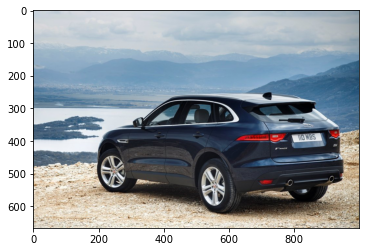

In [21]:
img = Image.open('./pict.jpg')
plt.imshow(img)
plt.show()

In [22]:
# Apply the transformations needed
trf = T.Compose([T.Resize(256),
            #T.CenterCrop(224),
            T.ToTensor(),
            T.Normalize(mean = [0.485, 0.456, 0.406],
                std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [23]:
# Pass the input through the net
out = fcn(inp)['out']

In [24]:
# We take a max index for each pixel position, which represents the class
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()

In [25]:
# Define the helper function
def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
                # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
                # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
                # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
                # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    
    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
    
    rgb = np.stack([r, g, b], axis=2)
    return rgb

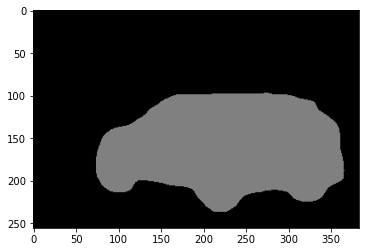

In [26]:
rgb = decode_segmap(om)
plt.imshow(rgb)
plt.show()